Total images loaded: 23709
Shape of X_faces: (23709, 100, 100, 3)
Shape of y_faces: (23709,)


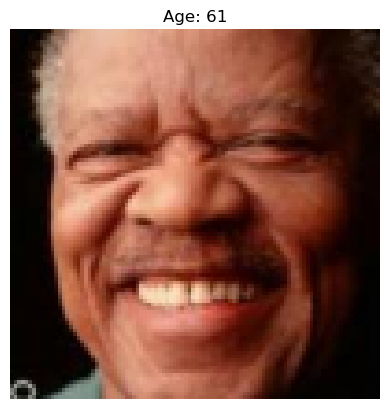

C:\Users\shrasti patel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 48s 75ms/step - loss: 359.2959 - mae: 14.2497 - val_loss: 194.5457 - val_mae: 10.2221
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - loss: 153.2041 - mae: 9.2647 - val_loss: 123.6179 - val_mae: 8.1331
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - loss: 123.6149 - mae: 8.2993 - val_loss: 113.8831 - val_mae: 7.7800
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 44s 75ms/step - loss: 101.0891 - mae: 7.4391 - val_loss: 133.4800 - val_mae: 8.8428
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 144s 243ms/step - loss: 92.7843 - mae: 7.1559 - val_loss: 100.7960 - val_mae: 7.4295
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - loss: 77.9646 - mae: 6.6243 - val_loss: 89.6971 - val_mae: 6.9243
Epoch 7/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - loss: 65.8068 - mae: 6.0559 - val_loss: 93.2264 - val_mae: 7.1290
Epoch 8/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - loss: 61.0986 - mae: 5.8841 - val_loss: 92.3042 - val_mae: 6.8522
Epoch 9/10


✅ Model training complete and saved as 'age_model.h5'


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Path to your images
data_path = 'D:/archive (11)/utkcropped'

# Load all images
images = []
labels = []

for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img_path = os.path.join(data_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (100, 100))  # Resize to (100x100)
            images.append(img)
            
            # Extract age from filename (assuming filename like "25_1_0_20170116174525125.jpg.chip.jpg")
            age = int(filename.split('_')[0])
            labels.append(age)

print(f"Total images loaded: {len(images)}")

if len(images) == 0:
    raise ValueError("No images loaded. Please check your data path and structure!")

# Convert to numpy arrays
X_faces = np.array(images, dtype=np.float32) / 255.0
y_faces = np.array(labels)

print(f"Shape of X_faces: {X_faces.shape}")
print(f"Shape of y_faces: {y_faces.shape}")

# Show a random sample image
idx = random.randint(0, len(X_faces) - 1)
plt.imshow(X_faces[idx])
plt.title(f"Age: {y_faces[idx]}")
plt.axis('off')
plt.show()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_faces, y_faces, test_size=0.2, random_state=42)

# Build a simple CNN model
age_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Predicting age (regression output)
])

age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
age_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the model
age_model.save('age_model.h5')

print("✅ Model training complete and saved as 'age_model.h5'")
